In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import numpy as np
from tqdm import tqdm
from matplotlib.pyplot import figure

In [2]:
def drop_indexies(data):
    data.index = np.arange(len(data))
    
def get_year(row):
    return str(row.year)

def get_month(row):
    return str(row.month)

def get_season(row):
    if row.month in [12, 1, 2]:
        return '1-winter'
    if row.month in [3, 4, 5]:
        return '2-spring'
    if row.month in [6, 7, 8]:
        return '3-summer'
    if row.month in [9, 10, 11]:
        return '4-autumn'
    
def get_field(data):
    for i in data.index:
        fields_list = data['field'][i]
        for field in fields_list:
            data[field][i] = 1

In [3]:
fields = {
         2 : 'Железо, электроника',
         3 : 'Сетевые технологии, администрирование, devops',
         4 : 'Проектирование, тестирование',
         5 : 'Информационная безопасность',
         6 : 'Маркетинг, контекстная реклама',
         7 : 'Верстка, html, javascript',
         8 : 'Машинное обучение',
         9 : 'E-commerce, финансы',
         10 : 'Дизайн интерфейсов',
         11 : 'Бизнес, CRM',
         12 : 'SEO'}

In [120]:
career_habr = pd.read_json('/Users/alexandrasorokovikova/Data Science/НИР Сравнение IT/Comparison-of-IT-trends/data/final_data/career_habr_final.json')
career_habr['time'] = pd.to_datetime(career_habr['time'], format='%Y.%m.%d')
career_habr = career_habr.sort_values(by='time')
career_habr['year'] = career_habr['time'].apply(get_year)
career_habr['month'] = career_habr['time'].apply(get_month)
career_habr['season'] = career_habr['time'].apply(get_season)
career_habr['year-season'] = career_habr['year'] + '-' + career_habr['season']
career_habr = career_habr[career_habr['year'] >= '2016']
career_habr.head()


,time,name,skills,field,year,month,season,year-season
640,2016-01-02 10:58:01+03:00,Разработчик binding для OpenHab,Разработка ПО Java,"[Проектирование, тестирование, Железо, электро...",2016,1,1-winter,2016-1-winter
645,2016-01-02 14:02:09+03:00,Senior Front-End Developer,Фронтенд JavaScript JQuery HTML CSS Jira Git V...,"[Проектирование, тестирование, Верстка, html, ...",2016,1,1-winter,2016-1-winter
644,2016-01-02 14:02:09+03:00,Senior QA Engineer,Тестирование Scrum Agile Jira Git Разработка т...,"[Верстка, html, javascript, Проектирование, те...",2016,1,1-winter,2016-1-winter
647,2016-01-03 19:06:55+03:00,Лендинг-менеджер (обработка входящих лидов),Продажи SMM Русский язык,"[Бизнес, CRM, Проектирование, тестирование, SEO]",2016,1,1-winter,2016-1-winter
648,2016-01-04 00:10:29+03:00,Разработчик Android,Приложения Разработка под Android Разработка м...,"[Верстка, html, javascript, Проектирование, те...",2016,1,1-winter,2016-1-winter


In [7]:
def stat_df(data, fields_columns):
    df = pd.DataFrame(columns = ['year-season', 'field'])
    for i in tqdm(data.index):
        for field in data['field'][i]:
            df.loc[len(df)] = [data['year-season'][i], field]
    return df

career_habr_stat = stat_df(career_habr, list(fields.values())[2:])
career_habr_stat.head()

100%|██████████| 18655/18655 [01:46<00:00, 175.53it/s]


,year-season,field
0,2016-1-winter,"Проектирование, тестирование"
1,2016-1-winter,"Железо, электроника"
2,2016-1-winter,"Верстка, html, javascript"
3,2016-1-winter,"Проектирование, тестирование"
4,2016-1-winter,"Верстка, html, javascript"


In [ ]:
def pivot_df(data, columns, values, func):
    df = pd.pivot_table(data, index = ['year-season'], columns = columns, values = values, aggfunc = func)
    df.columns = list(fields.values())[2:]
    df = df.fillna(0)

    for i in range(len(df)):
        df.iloc[i] = df.iloc[i]/sum(df.iloc[i])*100
    return df

In [111]:
def count_df(data):
    df = pd.DataFrame(index = list(data['year-season'].unique()), columns = list(fields.values()))
    for i in df.index:
        for column in df.columns:
            df.loc[i][column] = len(data[(data['year-season'] == i) & (data['field'] == column)])
            
    for i in range(len(df)):
        df.iloc[i] = df.iloc[i]/sum(df.iloc[i])*100
        
    df = df.astype('float64')
    
    return df

In [112]:
def plot_stat(data, title):
    for i in data.columns:
        figure(figsize=(10, 3), dpi=80)
        x = np.arange(data[i].size)
        fit = np.polyfit(x, data[i], deg=2)
        fit_function = np.poly1d(fit)
        y = fit_function(x)
        plt.plot(data[i].index, y, label=i)

        plt.plot(data.index, data[i], label=i)

        plt.xlabel('Year and season')
        plt.xticks(rotation = 90) 
        plt.ylabel('percent')
        plt.title(title)
        plt.legend()
        plt.grid()
        plt.show()

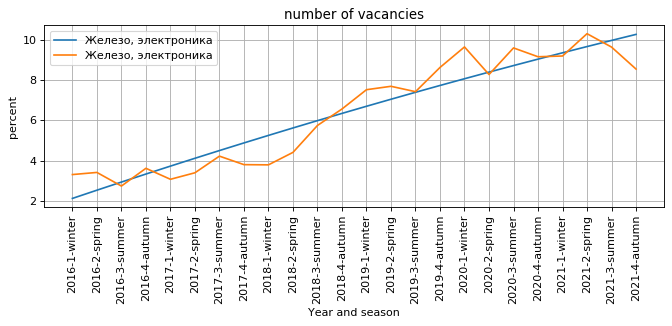

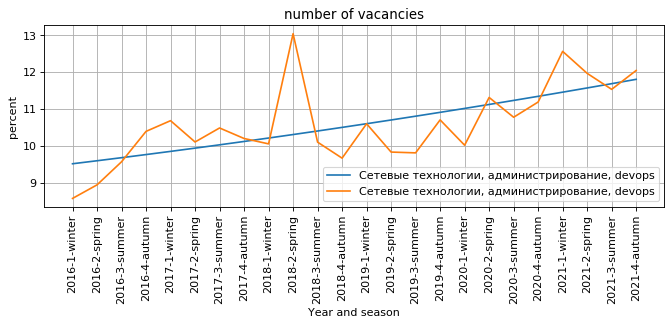

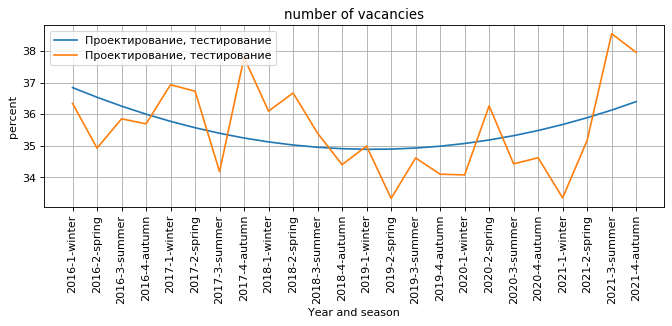

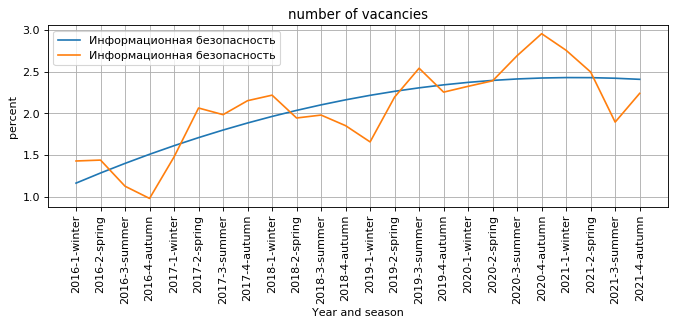

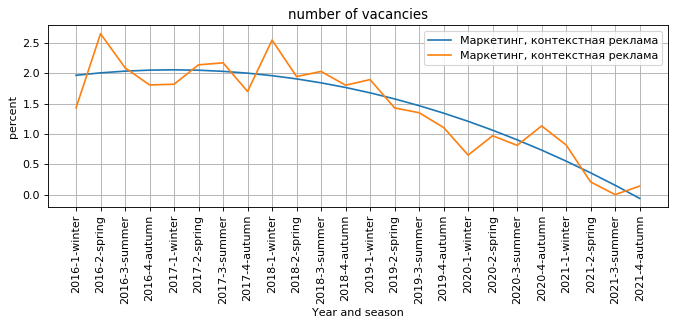

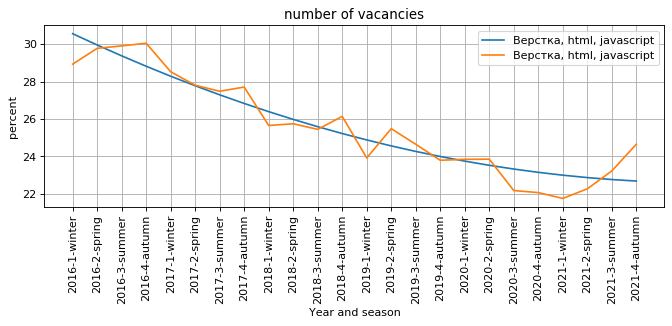

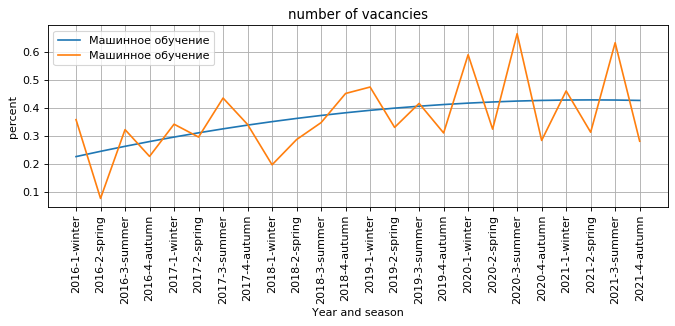

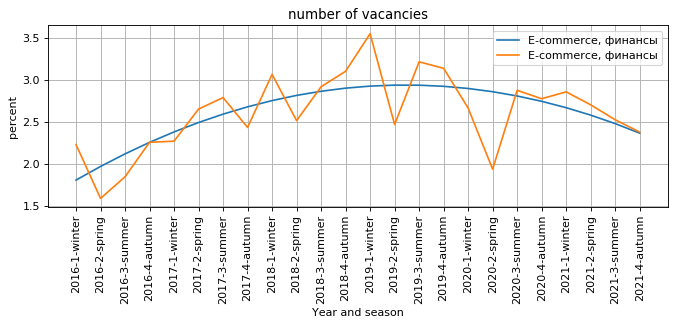

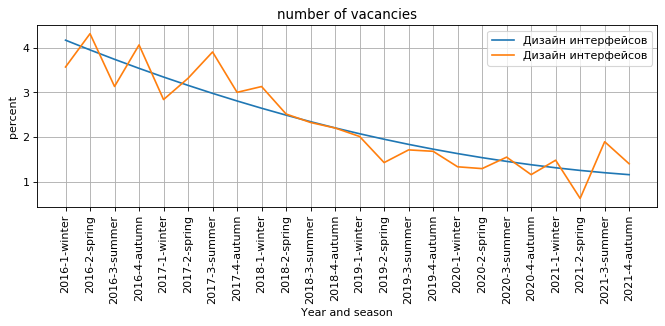

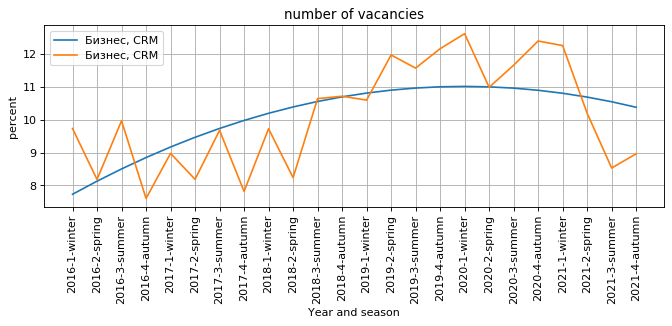

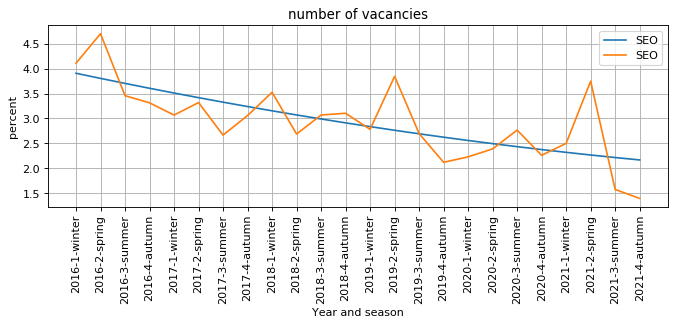

In [118]:
plot_stat(count_df(career_habr_stat).astype('float64'), 'number of vacancies')

In [60]:
def norm_name(row, names_list, normal_name):
    if row in names_list:
        return normal_name
    return row

In [61]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=frontend, normal_name='Frontend разработчик')

In [63]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=php, normal_name='PHP разработчик')

In [65]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=java, normal_name='Java разработчик')

In [67]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=android, normal_name='Android разработчик')

In [69]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=ios, normal_name='iOS разработчик')

In [74]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=devops, normal_name='DevOps Engineer')

In [76]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=web, normal_name='Web разработчик')

In [78]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=backend, normal_name='Backend разработчик')

In [80]:
career_habr['name'] = career_habr['name'].apply(norm_name, names_list=python, normal_name='Python разработчик')

In [73]:
# Names list
frontend = ['Frontend-разработчик',
 'Frontend разработчик',
 'Front-end разработчик',
 'Frontend Developer',
 'Frontend developer',
 'Senior Frontend Developer',
 'Python Developer',
 'Python developer']

php = ['PHP-разработчик',
 'PHP разработчик',
 'PHP-программист',
 'Python разработчик',
 'Senior PHP Developer',
 'PHP Developer',
 'Программист PHP',
 'Python Developer',
 'PHP developer',
 'PHP программист',
 'Python developer']

java = ['Java-разработчик',
 'Java разработчик',
 'Java Developer',
 'Java developer',
 'Senior Java Developer']

android = ['Android разработчик',
 'Android-разработчик',
 'Android Developer',
 'Android developer']c

ios = ['iOS разработчик',
 'IOS разработчик',
 'iOS-разработчик',
 'iOS developer',
 'iOS Developer']

devops = ['DevOps Engineer',
 'DevOps инженер',
 'DevOps']

web = ['Web-разработчик', 'Web-программист']

backend = ['Backend разработчик', 'Backend-разработчик']

python = ['Python разработчик', 'Python Developer', 'Python developer']


In [54]:
def get_close_matched(s, words, threshold = 0.8):
    s = s.lower()
    
    matches = []
    for word in words:
        word_lower = word.lower()
        count_matches = 0
        for i in s:
            if i in word_lower:
                count_matches += 1
        if count_matches/len(s) >= threshold:
            matches.append(word)
    
    return matches


get_close_matched('Python', list(career_habr['name'].value_counts().head(50).index), 0.7)

['Python разработчик', 'Python Developer', 'Python developer']

In [85]:
top_10_jobs = list(career_habr['name'].value_counts().head(10).index)
top_10_jobs

['Frontend разработчик',
 'PHP разработчик',
 'Java разработчик',
 'Android разработчик',
 'iOS разработчик',
 'Программист 1С',
 'DevOps Engineer',
 'Системный аналитик',
 'Web разработчик',
 'QA Engineer']

In [103]:
def get_job_stat(data, job):
    df = data.query('name == @job')[['name', 'year-season']].pivot_table(index='year-season', aggfunc = 'count')
    for i in df.index:
        df.loc[i] = df.loc[i]/len(career_habr[career_habr['year-season'] == i])*100
    return df

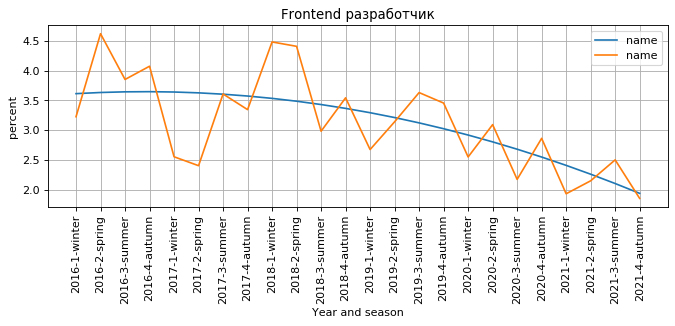

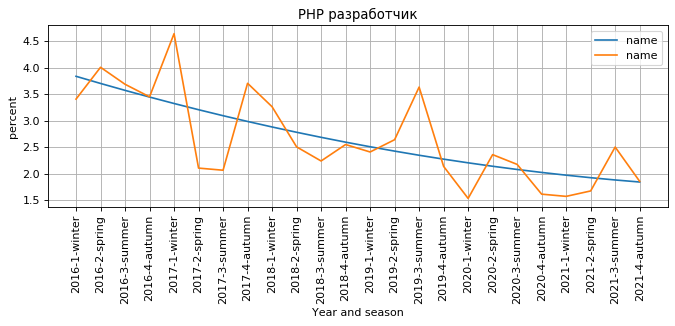

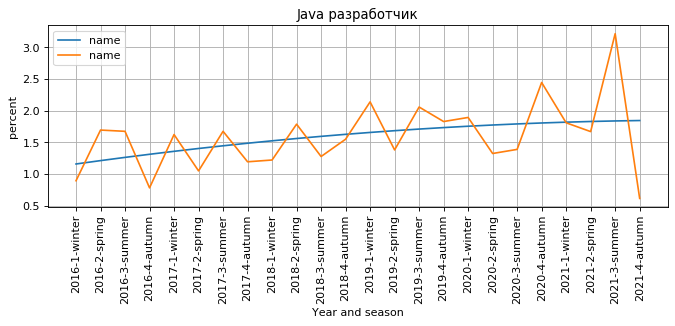

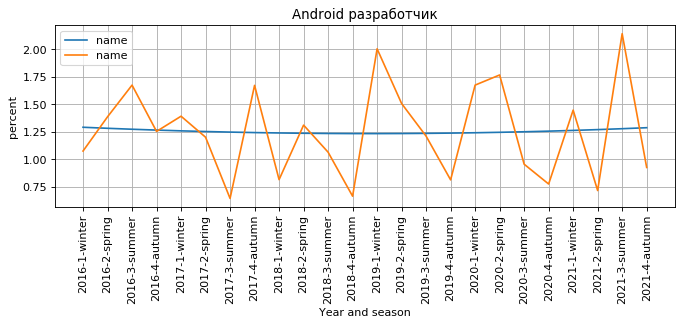

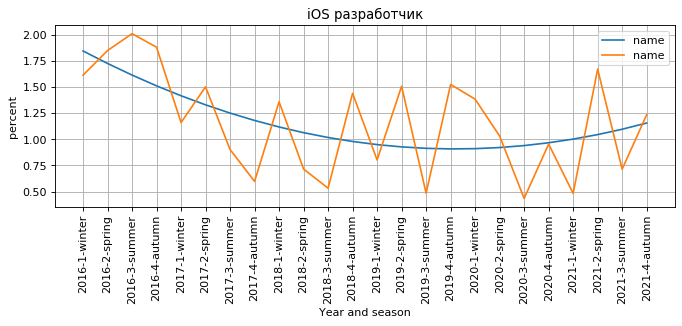

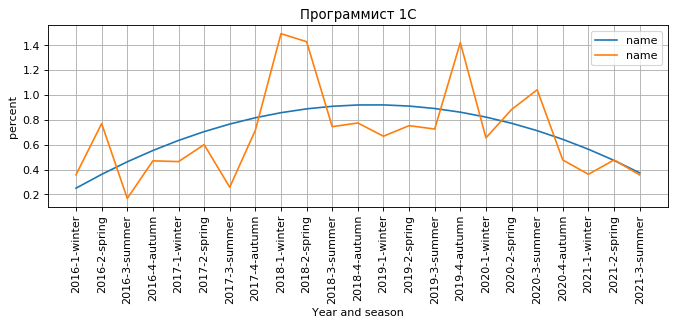

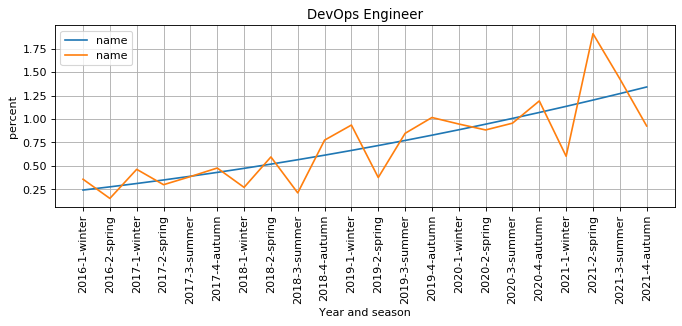

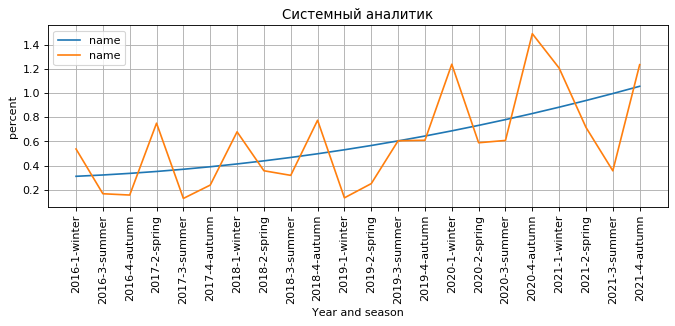

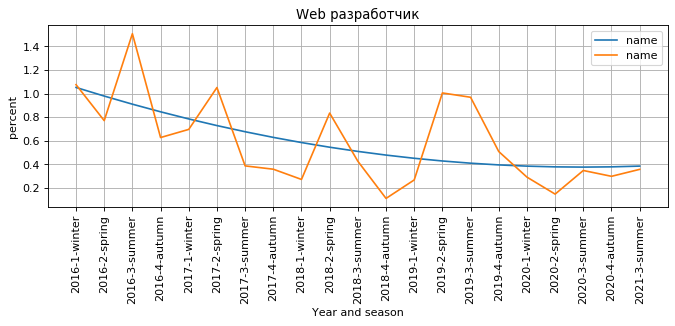

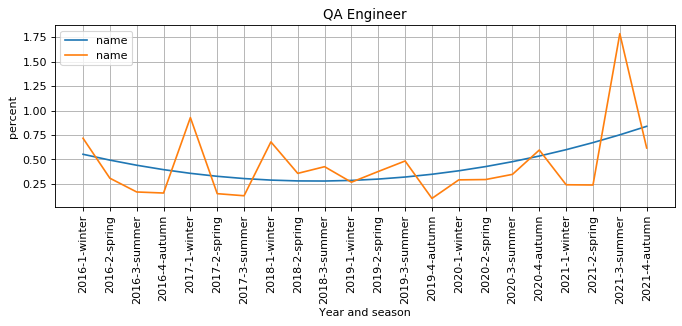

In [104]:
for i in top_10_jobs:
    plot_stat(get_job_stat(career_habr, i), i)

Frontend разработчик

PHP разработчик

Java разработчик

Android разработчик

iOS разработчик

Программист 1С

DevOps Engineer

Системный аналитик

Web разработчик

QA Engineer
